In [1]:
%matplotlib inline
from ROOT import TFile, TTree
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from root_numpy import root2array

In [2]:
myfile = '/Users/davidkaleko/larlite/UserDev/KalekoAna/'
myfile += 'CCInclusive/mac/TestMCTruth_ana_out.root'
df = pd.DataFrame( root2array( myfile, 'tree' ) )

In [3]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18394 entries, 0 to 18393
Data columns (total 13 columns):
absphidiff_minuspi    18394 non-null float64
reco_mu_p             18394 non-null float64
true_mu_p             18394 non-null float64
premnant              18394 non-null float64
ptremnant             18394 non-null float64
plane_Z_anglediff     18394 non-null float64
true_nu_E             18394 non-null float64
Eremnant              18394 non-null float64
Eccqe_truemumom       18394 non-null float64
Eccqe_recomumom       18394 non-null float64
true_mu_TotE          18394 non-null float64
true_p_KE             18394 non-null float64
reco_mu_TotE          18394 non-null float64
dtypes: float64(13)
memory usage: 2.0 MB
None


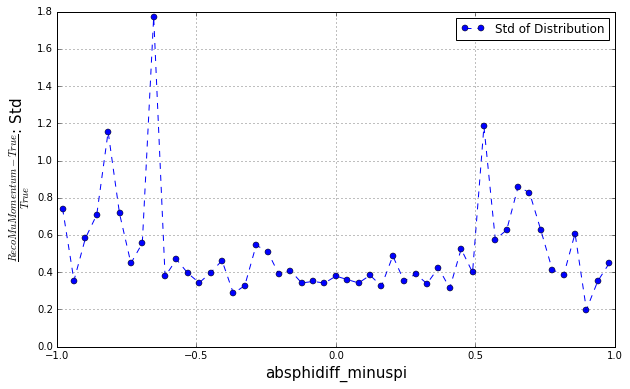

In [4]:
#reco-true/true
def pres_plot(xaxis='true_mu_p',cuts=None):
    binning = np.linspace(0,1.5,50)
    if xaxis == 'premnant': binning = np.linspace(0,0.4,50)
    if xaxis == 'absphidiff_minuspi': binning = np.linspace(-1,1,50)
        
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds = [], []
    for x in xrange(len(binning)-1):
        binmin = binning[x]
        binmax = binning[x+1]
        mydf = df
        if cuts is not None: 
            mydf = mydf.query(cuts)
        mydf = mydf.query('%s < %f and %s > %f'%(xaxis,binmax,xaxis,binmin))
        true = np.array(mydf['true_mu_p'])
        reco = np.array(mydf['reco_mu_p'])
        myreses.append( ((reco-true)/true).mean() )
        mystds.append( ((reco-true)/true).std() )
    plt.figure(figsize=(10,6))
    #plt.plot(bincenters[:-1],myreses,'ro--',label='Mean of Distribution')
    plt.plot(bincenters[:-1],mystds,'bo--',label='Std of Distribution')
    plt.ylabel('$\\frac{Reco Mu Momentum - True}{True}$: Std',fontsize=15)
    plt.xlabel('%s'%xaxis,fontsize=15)
    plt.grid(True)
    plt.legend()
    if xaxis == 'premnant':
        plt.ylim((0,2))
    if xaxis == 'true_mu_p':
        plt.ylim((0,3.))
        
pres_plot(xaxis='absphidiff_minuspi')

['absphidiff_minuspi' 'reco_mu_p' 'true_mu_p' 'premnant' 'ptremnant'
 'plane_Z_anglediff' 'true_nu_E' 'Eremnant' 'Eccqe_truemumom'
 'Eccqe_recomumom' 'true_mu_TotE' 'true_p_KE' 'reco_mu_TotE']


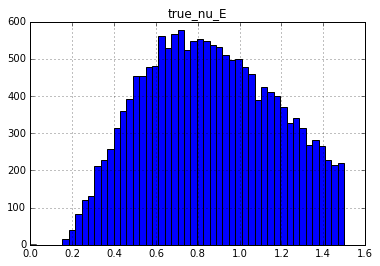

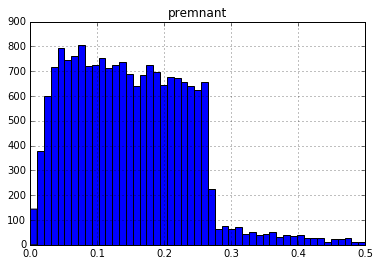

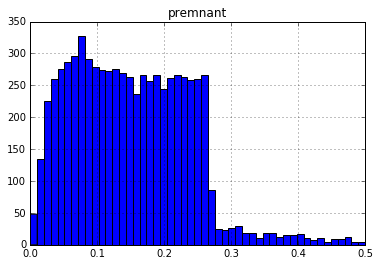

In [5]:
print df.columns.values
blah = df.hist('true_nu_E',bins=np.linspace(0,1.5,50))
blah = df.hist('premnant',bins=np.linspace(0,0.5,50))
blah = df.query('true_nu_E > 0.6 and true_nu_E < 1.0').hist('premnant',bins=np.linspace(0,0.5,50))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119346fd0>]], dtype=object)

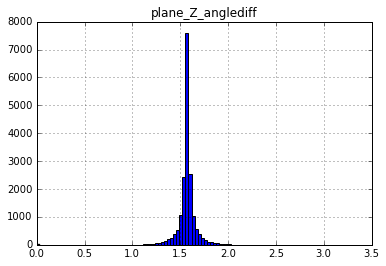

In [6]:
df.hist('plane_Z_anglediff',bins=np.linspace(0,3.14159,100))

In [7]:
def p_reco_smearing_plot(cuts=None):
    myquery = 'true_mu_p < 1.5 and true_mu_p > 0'
    myquery += ' and reco_mu_p < 1.5 and reco_mu_p > 0'
    if cuts:
        myquery += ' and ' + cuts
    myx = df.query(myquery)['true_mu_p']
    myy = df.query(myquery)['reco_mu_p']
    plt.figure(figsize=(10,6))
    nbins=50
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=nbins)
    plt.colorbar()
    plt.title('Muon Momentum Reconstruction Smearing',fontsize=20)
    plt.xlabel('True Muon Momentum [GeV]',fontsize=15)
    plt.ylabel('Reco Muon Momentum [GeV]',fontsize=15)
    plt.grid(True)
    plt.ylim(0,1.5)
    plt.plot(np.array(plt.xlim()),np.array(plt.ylim()),'w--',linewidth=3)

def phi_smearing_plot(xaxis='premnant', cuts=None):
    myquery = '%s < .275 and %s > 0' % (xaxis, xaxis)
    myquery += ' and absphidiff_minuspi < 1 and absphidiff_minuspi > -1'
    if cuts:
        myquery += ' and ' + cuts
    myx = df.query(myquery)[xaxis]
    myy = df.query(myquery)['absphidiff_minuspi']
    plt.figure(figsize=(10,6))
    nbins=50
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=nbins)
    plt.colorbar()
    plt.title('Sum Phi Smearing',fontsize=20)
    if xaxis == 'premnant':
        plt.xlabel('"Nuclear Remnant" Momentum [GeV]',fontsize=15)
    if xaxis == 'ptremnant':
        plt.xlabel('"Nuclear Remnant" Transverse Momentum [GeV]',fontsize=15)
    plt.ylabel('Phi Sum [Radians]',fontsize=15)
    plt.grid(True)
    plt.ylim(-1,1)
    
    
def planez_smearing_plot(cuts=None):
    myquery = 'premnant < .275 and premnant > 0'
    myquery += ' and plane_Z_anglediff < 2.07 and plane_Z_anglediff > 1'
    if cuts:
        myquery += ' and ' + cuts
    myx = df.query(myquery)['premnant']
    myy = df.query(myquery)['plane_Z_anglediff']
    plt.figure(figsize=(10,6))
    nbins=50
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=nbins)
    plt.colorbar()
    plt.title('Plane_Z_Anglediff Smearing',fontsize=20)
    plt.xlabel('"Nuclear Remnant" Momentum [GeV]',fontsize=15)
    plt.ylabel('Plane_Z_Anglediff [Radians]',fontsize=15)
    plt.grid(True)
    plt.ylim(1,2.07)


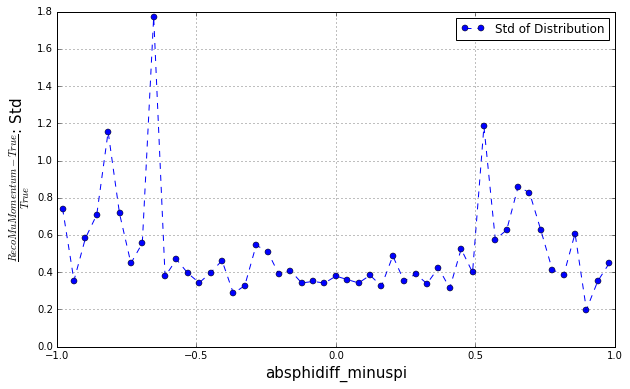

In [8]:
pres_plot(xaxis='absphidiff_minuspi')

/Library/Python/2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Library/Python/2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


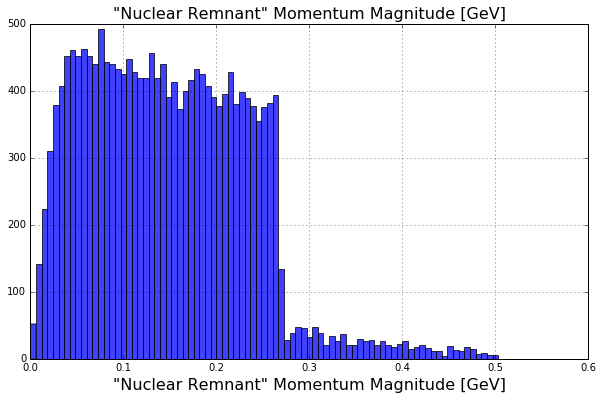

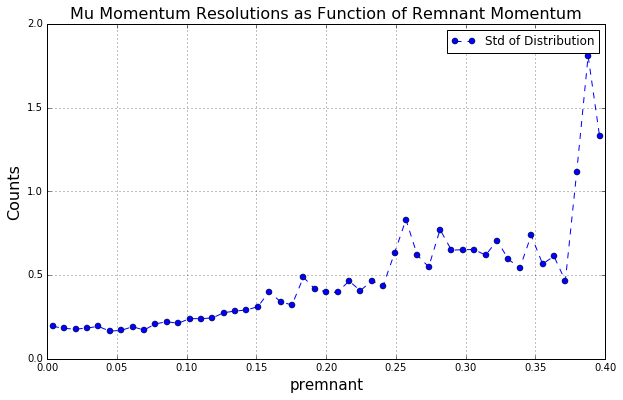

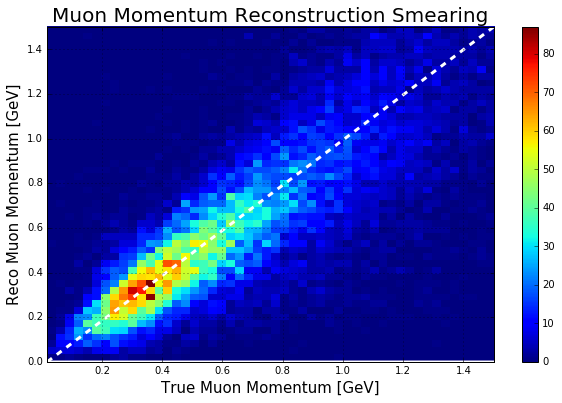

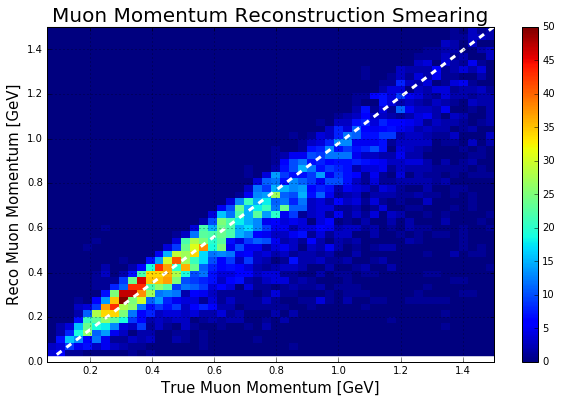

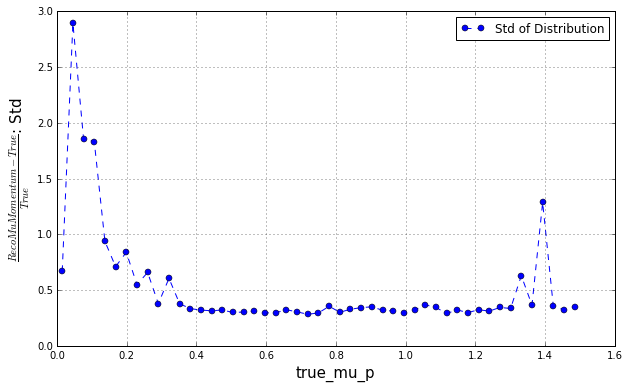

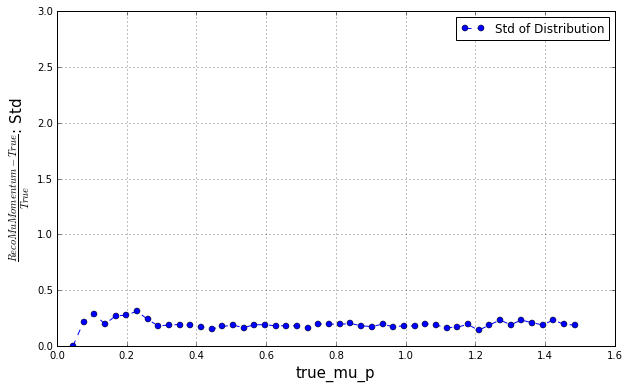

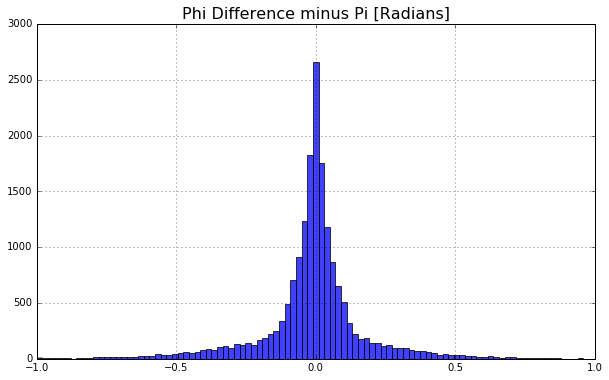

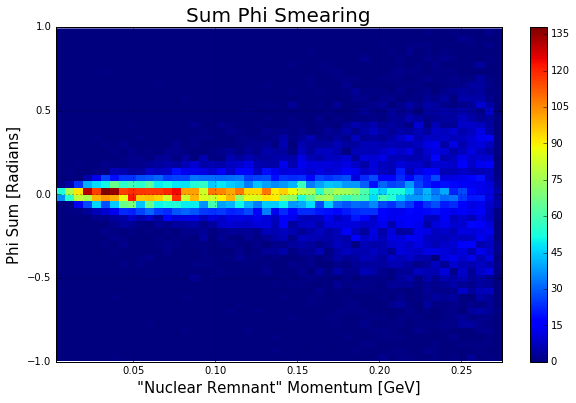

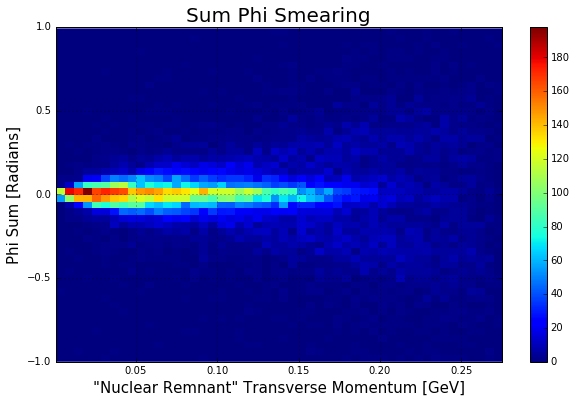

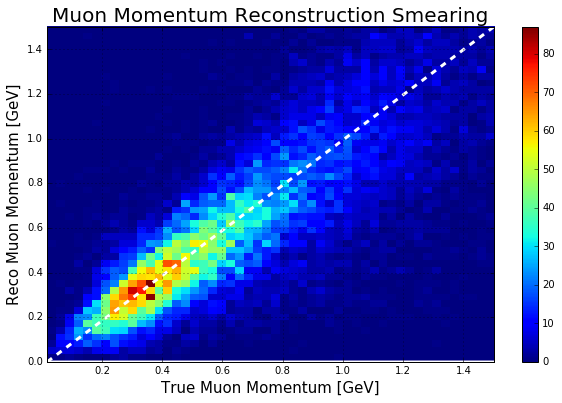

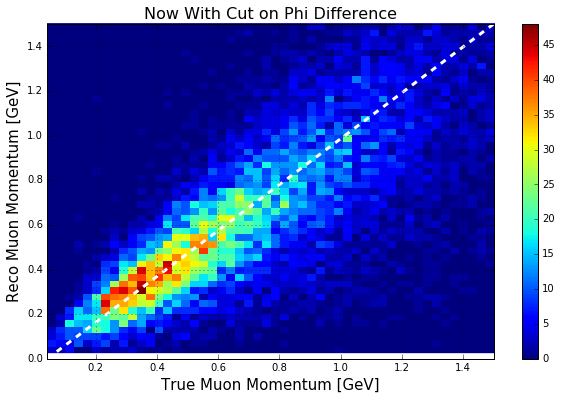

In [9]:
plt.figure(figsize=(10,6))
plt.title('"Nuclear Remnant" Momentum Magnitude [GeV]',fontsize=16)
blah = df['premnant'].hist(bins=np.linspace(0,0.6,100),alpha=0.75)
plt.xlabel('"Nuclear Remnant" Momentum Magnitude [GeV]',fontsize=16)
pres_plot(xaxis='premnant')
plt.title('Mu Momentum Resolutions as Function of Remnant Momentum',fontsize=16)
plt.ylabel('Counts',fontsize=16)


#pres_plot(xaxis='ptremnant')
#plt.title('Mu Momentum Resolutions as Function of Remnant TRANSVERSE Momentum',fontsize=16)
#pres_plot(mycuts)
#plt.title('Mu Momentum Resolutions: Cuts on Phi',fontsize=16)

p_reco_smearing_plot()
mycuts = 'premnant < 0.10'
#mycuts +=' and absphidiff_minuspi > -0.2 and absphidiff_minuspi < 0.2'
#mycuts = 'absphidiff_minuspi > -0.2 and absphidiff_minuspi < 0.2'
p_reco_smearing_plot(mycuts)
pres_plot(xaxis='true_mu_p')
pres_plot(xaxis='true_mu_p',cuts=mycuts)

myx = df['absphidiff_minuspi']
plt.figure(figsize=(10,6))
blah = plt.hist(myx,bins=np.linspace(-1,1,100),alpha=0.75)
blah = plt.title('Phi Difference minus Pi [Radians]',fontsize=16)
plt.grid(True)

phi_smearing_plot()
phi_smearing_plot(xaxis='ptremnant')

#planez_smearing_plot()
p_reco_smearing_plot()
p_reco_smearing_plot('absphidiff_minuspi > -0.1 and absphidiff_minuspi < 0.1')
plt.title('Now With Cut on Phi Difference',fontsize=16)


['absphidiff_minuspi' 'reco_mu_p' 'true_mu_p' 'premnant' 'ptremnant'
 'plane_Z_anglediff' 'true_nu_E' 'Eremnant' 'Eccqe_truemumom'
 'Eccqe_recomumom' 'true_mu_TotE' 'true_p_KE' 'reco_mu_TotE']


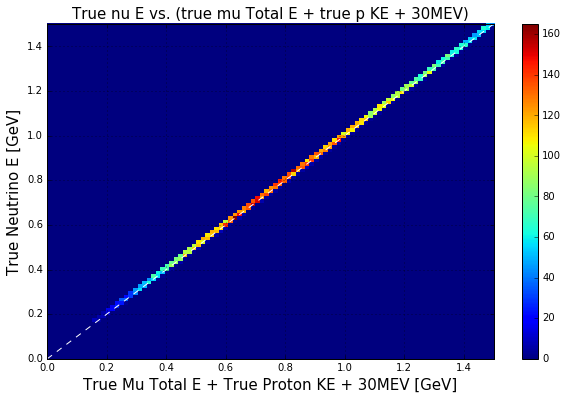

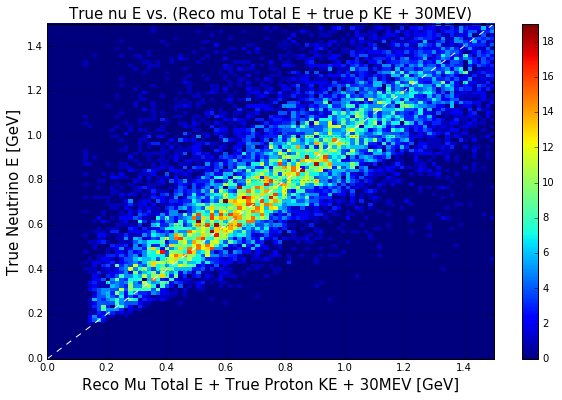

In [10]:
print df.columns.values
def truenuE_vs_reconuE_truth():
    myx = df['true_mu_TotE'] + df['true_p_KE'] + .030
    myy = df['true_nu_E']
    plt.figure(figsize=(10,6))
    mybins = np.linspace(0,1.5,100)
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=mybins)
    plt.colorbar()
    plt.title('True nu E vs. (true mu Total E + true p KE + 30MEV)',fontsize=15)
    plt.xlabel('True Mu Total E + True Proton KE + 30MEV [GeV]',fontsize=15)
    plt.ylabel('True Neutrino E [GeV]',fontsize=15)
    plt.grid(True)
    plt.plot(np.array(plt.xlim()),np.array(plt.ylim()),'w--',linewidth=1)
def truenuE_vs_reconuE_reco():
    myx = df['reco_mu_TotE'] + df['true_p_KE'] + .030
    myy = df['true_nu_E']
    plt.figure(figsize=(10,6))
    mybins = np.linspace(0,1.5,100)
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=mybins)
    plt.colorbar()
    plt.title('True nu E vs. (Reco mu Total E + true p KE + 30MEV)',fontsize=15)
    plt.xlabel('Reco Mu Total E + True Proton KE + 30MEV [GeV]',fontsize=15)
    plt.ylabel('True Neutrino E [GeV]',fontsize=15)
    plt.grid(True)
    plt.plot(np.array(plt.xlim()),np.array(plt.ylim()),'w--',linewidth=1)

truenuE_vs_reconuE_truth()
truenuE_vs_reconuE_reco()

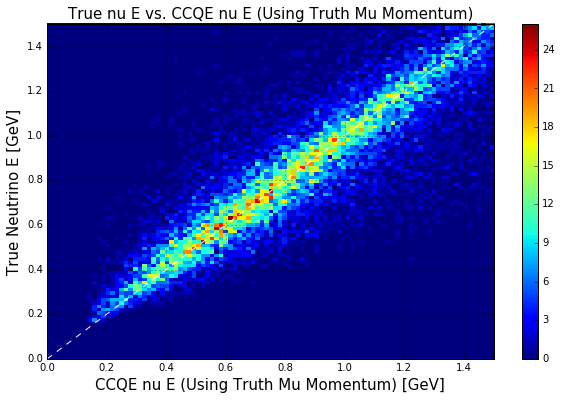

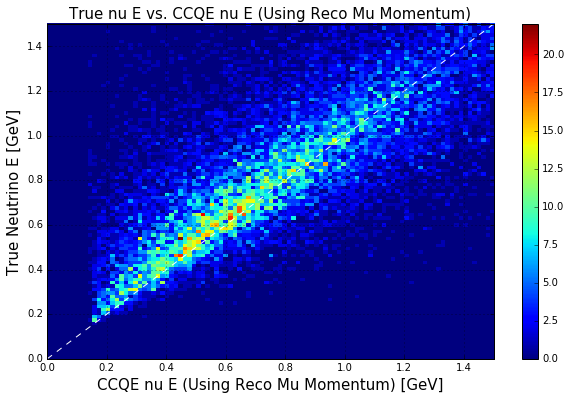

In [11]:
def truenuE_vs_reconuE_CCQEtruth():
    myx = df['Eccqe_truemumom']
    myy = df['true_nu_E']
    plt.figure(figsize=(10,6))
    mybins = np.linspace(0,1.5,100)
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=mybins)
    plt.colorbar()
    plt.title('True nu E vs. CCQE nu E (Using Truth Mu Momentum)',fontsize=15)
    plt.xlabel('CCQE nu E (Using Truth Mu Momentum) [GeV]',fontsize=15)
    plt.ylabel('True Neutrino E [GeV]',fontsize=15)
    plt.grid(True)
    plt.plot(np.array(plt.xlim()),np.array(plt.ylim()),'w--',linewidth=1)
def truenuE_vs_reconuE_CCQEreco():
    myx = df['Eccqe_recomumom']
    myy = df['true_nu_E']
    plt.figure(figsize=(10,6))
    mybins = np.linspace(0,1.5,100)
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=mybins)
    plt.colorbar()
    plt.title('True nu E vs. CCQE nu E (Using Reco Mu Momentum)',fontsize=15)
    plt.xlabel('CCQE nu E (Using Reco Mu Momentum) [GeV]',fontsize=15)
    plt.ylabel('True Neutrino E [GeV]',fontsize=15)
    plt.grid(True)
    plt.plot(np.array(plt.xlim()),np.array(plt.ylim()),'w--',linewidth=1)
    
truenuE_vs_reconuE_CCQEtruth()
truenuE_vs_reconuE_CCQEreco()

In [12]:
print df.columns.values

['absphidiff_minuspi' 'reco_mu_p' 'true_mu_p' 'premnant' 'ptremnant'
 'plane_Z_anglediff' 'true_nu_E' 'Eremnant' 'Eccqe_truemumom'
 'Eccqe_recomumom' 'true_mu_TotE' 'true_p_KE' 'reco_mu_TotE']


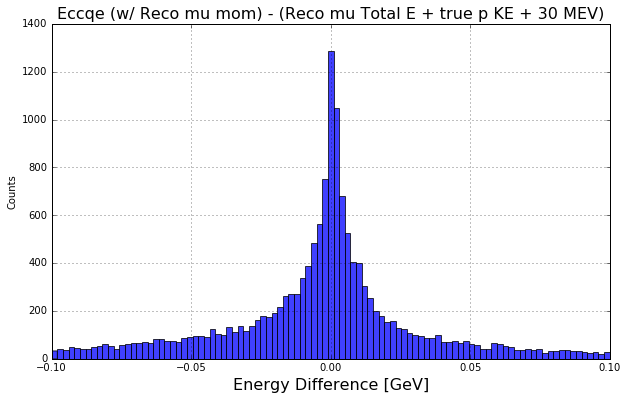

In [13]:
plt.figure(figsize=(10,6))
myx = np.array(df['Eccqe_recomumom'] - df['reco_mu_TotE'] - df['true_p_KE'] - 0.030)
blah = plt.hist(myx,bins=np.linspace(-0.1,0.1,100),alpha=0.75)
blah = plt.grid(True)
blah = plt.title('Eccqe (w/ Reco mu mom) - (Reco mu Total E + true p KE + 30 MEV)',fontsize=16)
fart = plt.xlabel('Energy Difference [GeV]',fontsize=16)
fart = plt.ylabel('Counts')
fart = plt.xlim((-0.1,0.1))

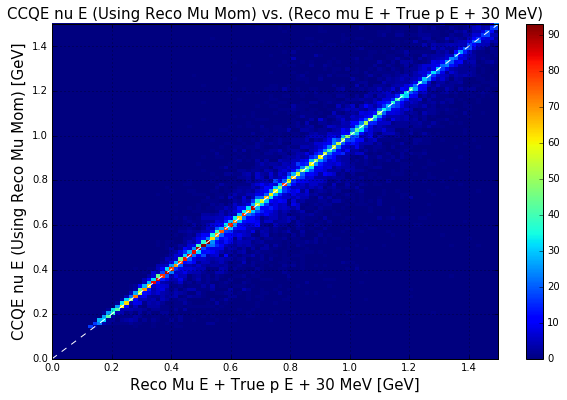

In [15]:
def CCQEreco_vs_nuEreco():
    myy = df['Eccqe_recomumom']
    myx = df['reco_mu_TotE'] + df['true_p_KE'] + 0.030
    plt.figure(figsize=(10,6))
    mybins = np.linspace(0,1.5,100)
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=mybins)
    plt.colorbar()
    plt.title('CCQE nu E (Using Reco Mu Mom) vs. (Reco mu E + True p E + 30 MeV)',fontsize=15)
    plt.xlabel('Reco Mu E + True p E + 30 MeV [GeV]',fontsize=15)
    plt.ylabel('CCQE nu E (Using Reco Mu Mom) [GeV]',fontsize=15)
    plt.grid(True)
    plt.plot(np.array(plt.xlim()),np.array(plt.ylim()),'w--',linewidth=1)
CCQEreco_vs_nuEreco()

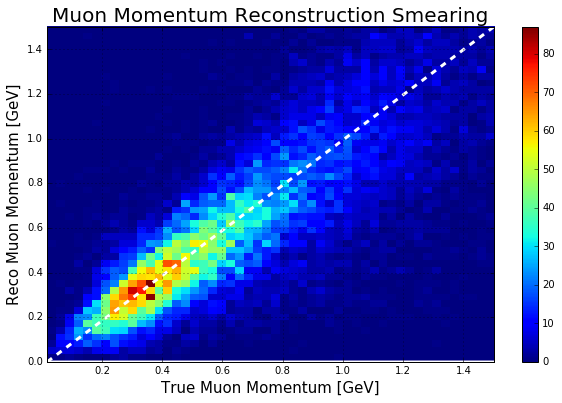

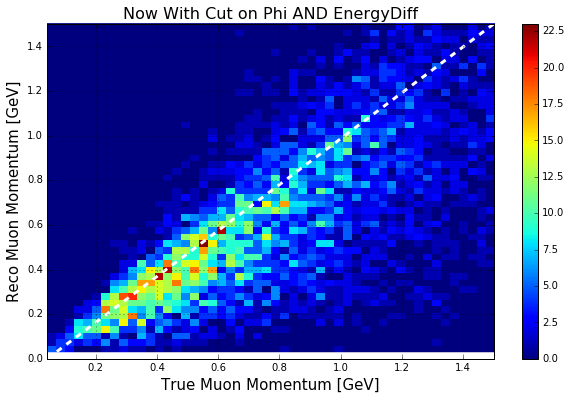

In [20]:
p_reco_smearing_plot()
df['energydiffreco'] = df['Eccqe_recomumom'] - df['reco_mu_TotE'] - df['true_p_KE'] - 0.030
mycut = 'absphidiff_minuspi > -0.1 and absphidiff_minuspi < 0.1'
mycut += ' and energydiffreco > -0.01 and energydiffreco < 0.01'
p_reco_smearing_plot(mycut)
plt.title('Now With Cut on Phi AND EnergyDiff',fontsize=16)

